In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [2]:
df=pd.read_csv('glass.data',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.columns=['Id','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   Ri             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df=df.drop(columns='Id')

In [29]:
df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64000,4.49,1.10000,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89000,3.60,1.36000,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53000,3.55,1.54000,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21000,3.69,1.29000,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27000,3.62,1.24000,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14000,0.00,1.38067,72.61,0.08,9.18,0.0,0.0,7
210,1.51685,13.34288,0.00,1.99000,73.06,0.00,8.40,0.0,0.0,7
211,1.52065,14.36000,0.00,2.02000,73.42,0.00,8.44,0.0,0.0,7
212,1.51651,14.38000,0.00,1.94000,73.61,0.00,8.48,0.0,0.0,7


In [7]:
def box(a):
    sns.boxplot(df[a])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


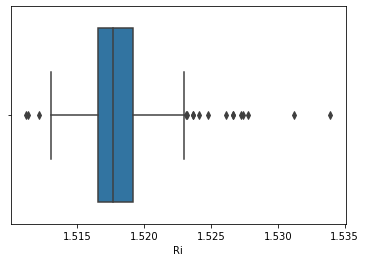

In [8]:
box('Ri')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


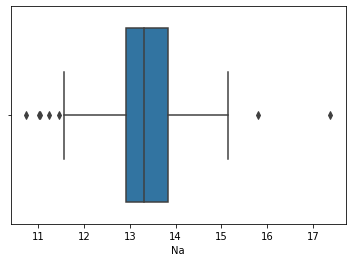

In [9]:
box('Na')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


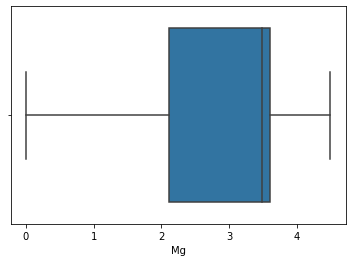

In [10]:
box('Mg')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


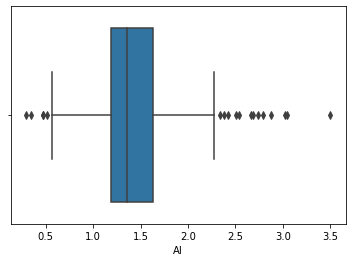

In [11]:
box('Al')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


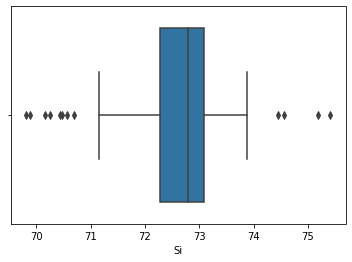

In [12]:
box('Si')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


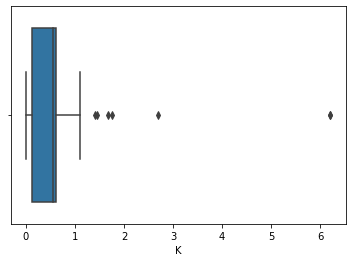

In [13]:
box('K')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


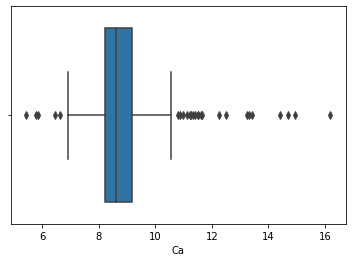

In [14]:
box('Ca')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


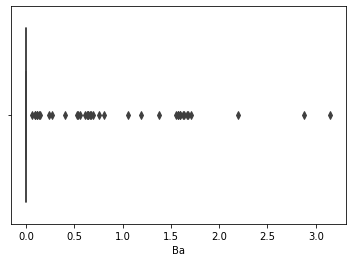

In [15]:
box('Ba')

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


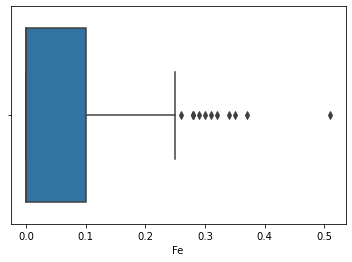

In [16]:
box('Fe')

In [17]:
#function for imputing
def outliremo(x):
    q3=df[x].quantile(.75)
    q1=df[x].quantile(.25)
    iqr=q3-q1
    df[x][(df[x]>(q3+iqr))|(df[x]<(q1-iqr))]=df[x][(df[x]<=(q3+iqr)) & (df[x]>=(q1-iqr))].mean() 
    return df[x]

In [18]:
outliremo('Ri')
outliremo('Na')
outliremo('Al')
outliremo('Ba')
outliremo('Si')
outliremo('Ca')
outliremo('K')
outliremo('Fe')


C:\Users\sakth\AppData\Local\Temp\ipykernel_18420\3836826090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][(df[x]>(q3+iqr))|(df[x]<(q1-iqr))]=df[x][(df[x]<=(q3+iqr)) & (df[x]>=(q1-iqr))].mean()


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
209    0.0
210    0.0
211    0.0
212    0.0
213    0.0
Name: Fe, Length: 214, dtype: float64

we removed the outliers

In [19]:
#let see the linear relations of each feature with target

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Ri'>

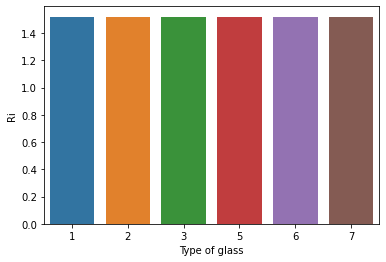

In [20]:
sns.barplot(df['Type of glass'],df.iloc[:,0])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

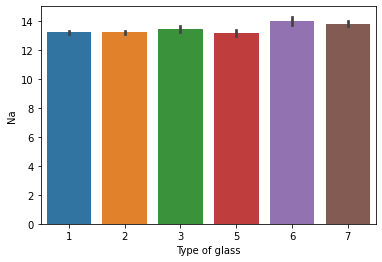

In [21]:
sns.barplot(df['Type of glass'],df.iloc[:,1])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

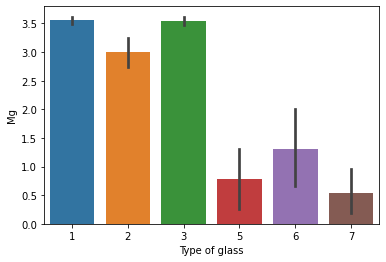

In [22]:
sns.barplot(df['Type of glass'],df.iloc[:,2])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

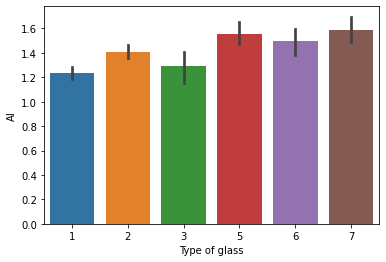

In [23]:
sns.barplot(df['Type of glass'],df.iloc[:,3])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

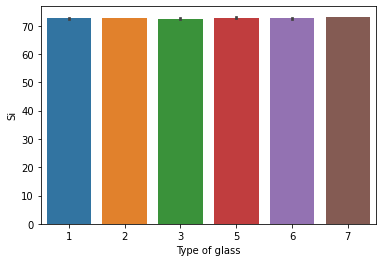

In [24]:
sns.barplot(df['Type of glass'],df.iloc[:,4])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='K'>

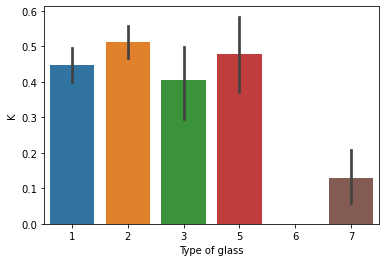

In [25]:
sns.barplot(df['Type of glass'],df.iloc[:,5])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

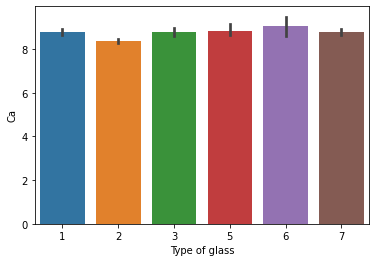

In [26]:
sns.barplot(df['Type of glass'],df.iloc[:,6])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

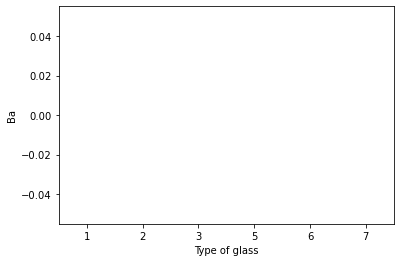

In [27]:
sns.barplot(df['Type of glass'],df.iloc[:,7])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

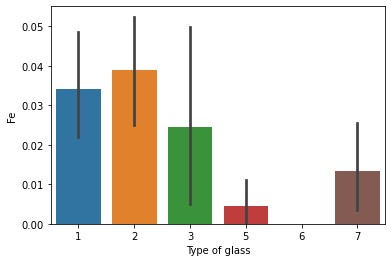

In [28]:
sns.barplot(df['Type of glass'],df.iloc[:,8])

from the above we can see that the feature Ri,Si,Ba has no relationdhip with the target hence we remove those columns

In [30]:
dt=df.drop(columns=['Ri','Si','Ba'])

In [31]:
dt

,Na,Mg,Al,K,Ca,Fe,Type of glass
0,13.64000,4.49,1.10000,0.06,8.75,0.0,1
1,13.89000,3.60,1.36000,0.48,7.83,0.0,1
2,13.53000,3.55,1.54000,0.39,7.78,0.0,1
3,13.21000,3.69,1.29000,0.57,8.22,0.0,1
4,13.27000,3.62,1.24000,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...
209,14.14000,0.00,1.38067,0.08,9.18,0.0,7
210,13.34288,0.00,1.99000,0.00,8.40,0.0,7
211,14.36000,0.00,2.02000,0.00,8.44,0.0,7
212,14.38000,0.00,1.94000,0.00,8.48,0.0,7


In [32]:
x=dt.drop(columns='Type of glass')
y=dt['Type of glass']

In [39]:
x_std=StandardScaler().fit_transform(x)

In [48]:
x_train,x_test,y_train,y_teswt=train_test_split(x_std,y,test_size=.30,random_state=3)

In [74]:

a=[]
b=[]
kf=KFold(n_splits=5)
for i in [2,5,6,8,10]:
    model1=KNeighborsClassifier(metric='sqeuclidean',n_neighbors=i)
    params={'weights':['uniform','distance']}
    gv=GridSearchCV(model1,param_grid=params,scoring='accuracy')
    gv.fit(x_train,y_train)
    a.append(gv.best_estimator_)
    b.append(accuracy_score(y_teswt,gv.best_estimator_.predict(x_test)))

In [75]:
a

[KNeighborsClassifier(metric='sqeuclidean', n_neighbors=2),
 KNeighborsClassifier(metric='sqeuclidean', weights='distance'),
 KNeighborsClassifier(metric='sqeuclidean', n_neighbors=6),
 KNeighborsClassifier(metric='sqeuclidean', n_neighbors=8),
 KNeighborsClassifier(metric='sqeuclidean', n_neighbors=10)]

In [76]:
b

[0.5538461538461539,
 0.5846153846153846,
 0.5538461538461539,
 0.6,
 0.5846153846153846]

In [ ]:
#this is the best model when distance metric is sqeuclidean
#KNeighborsClassifier(metric='sqeuclidean', n_neighbors=8)

In [71]:

a=[]
b=[]
kf=KFold(n_splits=5)
for i in [2,5,6,8,12]:
    model1=KNeighborsClassifier(metric='manhattan',n_neighbors=i)
    params={'weights':['uniform','distance']}
    gv=GridSearchCV(model1,param_grid=params,scoring='accuracy')
    gv.fit(x_train,y_train)
    a.append(gv.best_estimator_)
    b.append(accuracy_score(y_teswt,gv.best_estimator_.predict(x_test)))

In [72]:
a

[KNeighborsClassifier(metric='manhattan', n_neighbors=2),
 KNeighborsClassifier(metric='manhattan', weights='distance'),
 KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance'),
 KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance'),
 KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')]

In [73]:
b

[0.6,
 0.6307692307692307,
 0.6153846153846154,
 0.6615384615384615,
 0.6307692307692307]

In [ ]:
#this is the best model when distance metric is manhattan
#KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')